In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a random dataset with 200 samples
np.random.seed(42)

# Generate 5 features
n_samples = 1000
X = np.random.randn(n_samples, 2)

# Generate 2 classes (0, 1)
y = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(2)])
df['target'] = y

print(f"Dataset shape: {df.shape}")
print("Class distribution:")
print(df['target'].value_counts().sort_index())
print("First 5 rows:")
df.head()

Dataset shape: (1000, 3)

Class distribution:
target
0    497
1    503
Name: count, dtype: int64

First 5 rows:


,feature_1,feature_2,target
0,0.496714,-0.138264,0
1,0.647689,1.523030,0
2,-0.234153,-0.234137,0
3,1.579213,0.767435,0
4,-0.469474,0.542560,1


In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 700
Testing set size: 300


In [24]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.4900


In [25]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as DataFrame
cm_df = pd.DataFrame(cm, 
                     index=[f'True {i}' for i in range(2)],
                     columns=[f'Pred {i}' for i in range(2)])

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
        Pred 0  Pred 1
True 0      59      97
True 1      56      88


In [26]:
# Calculate classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Classification Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Classification Metrics:
Accuracy:  0.4900
Precision: 0.4757
Recall:    0.6111
F1 Score:  0.5350


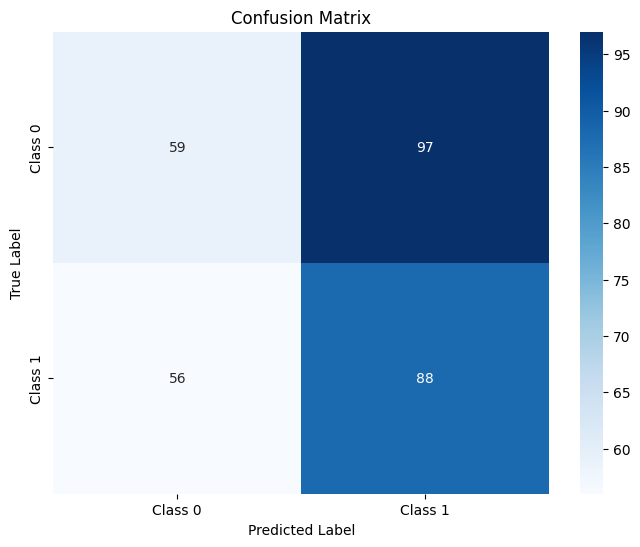

In [27]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Class {i}' for i in range(2)],
            yticklabels=[f'Class {i}' for i in range(2)])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()